# EARTHSC 5205 Group 4 
## Project #3: Measuring Stellar Elemental Abundance

How to measure elemental abundance using the curve of growth method

* v1: Last revused 27-Mar-2022 by Yuanhao Shi (shi.1222@osu.edu).

## Sodium 5890 and 5896 doublet arises from the 3p - 3s transition:
<img src="http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/imgqua/Nadoub.gif" width="200 pt">


## Solar spectrum is from: http://bass2000.obspm.fr/solar_spect.php

In [1]:
# Import necessary python package
import math
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii 

In [2]:
# Import the solar spectrum into python
spec = astropy.io.ascii.read("solar_spectrum.txt")

Text(0, 0.5, 'Normalized Flux')

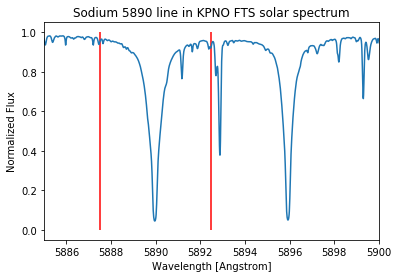

In [3]:
# Plot the Wavelength vs. Normalized Flux graph for the Sodium 5890 line
plt.plot(spec["col1"], spec["col2"] / 1e4)
plt.vlines(5887.5, 0, 1, color="red")
plt.vlines(5892.5, 0, 1, color="red")
plt.xlim(5885, 5900)
plt.title("Sodium 5890 line in KPNO FTS solar spectrum")
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

Text(0, 0.5, 'Normalized Flux')

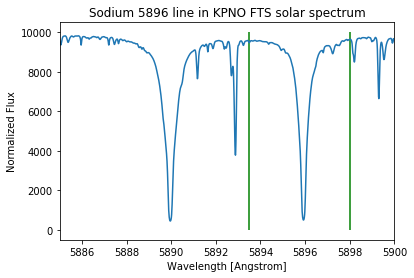

In [4]:
# Plot the Wavelength vs. Normalized Flux graph for the Sodium 5896 line
plt.plot(spec["col1"], spec["col2"])
plt.vlines(5893.5, 0, 10000, color="green")
plt.vlines(5898, 0, 10000, color="green")
plt.xlim(5885, 5900)
plt.title("Sodium 5896 line in KPNO FTS solar spectrum")
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

## Measuring the equivalent width

Equivalent width (ew) is defined as the width of a rectangle with a height equal to that of continuum emission such that the area of the rectangle is equal to the area in the spectral line.

In [10]:
ind_5890 = np.where((spec["col1"] < 5892.5) & (spec["col1"] > 5887.5))
inc_5890 = np.median(np.diff(spec["col1"][ind_5890]))
ew_5890 = np.sum(1e4 - spec["col2"][ind_5890]) * inc_5890 / 1e4
print("Based on Sodium 5890 line the Equivalent width (ew) = ", ew_5890, " Angstroms")

Based on Sodium 5890 line the Equivalent width (ew) =  0.8346720000182191  Angstroms


In [13]:
# Use 5896 to measure equivalent width
ind_5896 = np.where((spec["col1"] < 5898) & (spec["col1"] > 5893.5))
inc_5896 = np.median(np.diff(spec["col1"][ind_5896]))
ew_5896 = np.sum(1e4 - spec["col2"][ind_5896]) * inc_5896 / 1e4
print("Based on Sodium 5896 line the Equivalent width (ew) = ", ew_5896, " Angstroms")

Based on Sodium 5896 line the Equivalent width (ew) =  0.6701250000146274  Angstroms


## Computing the vertical position on curve of growth
Use the measured equivalent widths to compute the quantity plotted on the vertical scale of the curve of growth:
$\begin{align}
  y &= log_{10}(\frac{EW}{\lambda}) \;
\end{align}$


In [14]:
lambda_5890 = 5890.0
y_5890 = np.log10(ew_5890 / lambda_5890)
print("The y value for the Sodium 5890 line is", y_5890)

The y value for the Sodium 5890 line is -3.8485994499231455


In [15]:
lambda_5896 = 5896.0
y_5896 = np.log10(ew_5896 / lambda_5896)
print("The y value for the Sodium 5896 line is", y_5896)

The y value for the Sodium 5896 line is -3.944401654608152


* We choose -3.85 as the y value first.

## Read the horizontal value from the curve of growth
Find the number of Na atoms in absorbing state based on the following curve of growth plot:
<img src="http://spiff.rit.edu/classes/phys440/lectures/curve/gcurve.jpg" width="600 pt">

Equation for the horizontal value:
$
  x = log_{10}(Nf\frac{\lambda}{5000\overset{\circ}{A}})
$

From the plot, the corresponding horizontal value x is $\sim$14.8 for the both Sodium lines.

## Compute the number of neutral atoms 
N is the column density of atoms in the lower state.\
f is the oscillator strength for the transition producing the line.

* Column density: number of atoms per square cm along the line of sight. 
* Oscillator: the probability that an atom starting in some lower energy state will absorb a photon and jump up to some particular higher energy state

![Simplified_level_sheme](Simplified_level_sheme.jpg)

From the plot above, for the transition from 3s to 3p at 5890$\overset{\circ}{A}$:\
* The oscillator strength is f = 0.65.

$
  x = log_{10}(Nf\frac{\lambda}{5000\overset{\circ}{A}}) 
$\
\
$ 14.8 = log_{10}(N * 0.65 * \frac{\lambda}{5000\overset{\circ}{A}}) 
$

In [16]:
N = '{:e}'.format(10**14.8 / 0.65 / (5890 / 5000))
print("The value of column density is", N)

The value of column density is 8.240268e+14


* The column density is $8.24\times10^{14} atoms/cm^2$.

## Questions:
## 1. Estimate the ratio of sodium atoms in the ground state to sodium atoms in excited states using the Boltzmann equation:
### $\frac{N_2}{N_1} = \frac{g_2}{g_1}\exp\left({-\frac{E_2 - E_1}{kT}}\right)$
where subscripts 1 and 2 refer to ground state (3s) and excited state (3p), $N$ is number density, $g$ is the number of separate, individual states that are degenerate in energy, $E$ is energy at the state, $k$ is Boltzmann constant, and $T$ is temperature.\
The energy of these two states can be found here:\
https://physics.nist.gov/cgi-bin/ASD/energy1.pl?de=0&spectrum=NA+I&submit=Retrieve+Data&units=1&format=0&output=0&page_size=15&multiplet_ordered=0&conf_out=on&term_out=on&level_out=on&unc_out=1&j_out=on&lande_out=on&perc_out=on&biblio=on&temp=\
* $g_1$ = 2, $g_2$ = 6
* $E_a$ = 0, $E_b$ = $2.105 eV$
* $k$ = $1.38\times10^{-23} J/K$
* $T$ = $5800 K$

In [17]:
g_1 = 2
g_2 = 6
E_1 = 0
E_2 = 2.105
k = 1.38e-23
T = 5800
ratio_1 = (g_2 / g_1) * np.exp(-((E_2 - E_1) * 1.6e-19) / (k * T))
print("The ratio of the sodium atoms in the ground state to \
sodium atoms in excited states is " + f'{ratio_1:.3f}' + ".")

The ratio of the sodium atoms in the ground state to sodium atoms in excited states is 0.045.


## 2. Estimate the ratio of neutral sodium atoms to ionized sodium atoms by using the Saha equation:

## $\frac{Na_{II}}{Na_{I}} = \frac{2kT}{P_e} \frac{Z_{II}}{Z_I} \left(\frac{2\pi m_e kT}{h^2}\right)^{3/2}\exp{\left(-\frac{\chi}{kT}\right)}$ 
where electron mass $m_e = 9.1\cdot 10^{-31}$, partition function $Z_I = 2.4$ and  $Z_{II} = 1.0$, electron pressure $P_e = n_e kT = 1.0 N\cdot m^{-2}$, the Planck constant $h = 6.626\cdot 10^{-34} m\cdot kg^2/s $ and the ionization energy $\chi = 5.1$ eV.\
Note that the values given are for the sodium line only. Other lines have different values. 

In [18]:
m_e = 9.1e-31
Z_1 = 2.4
Z_2 = 1.0
P_e = 1.0
h = 6.626e-34
x = 5.1 * 1.6e-19 # change unit from eV to J
ratio_2 = (2 * k * T * Z_2) / (P_e * Z_1) * (2 * np.pi * m_e * k * T / h**2)**(3/2) * np.exp(-x / (k * T))
print("The ratio of the neutral sodium atoms \
to ionized sodium atoms is " + f'{ratio_2:.0f}' + ".")

The ratio of the neutral sodium atoms to ionized sodium atoms is 2652.


## 3. Compute the total column density of sodium atoms in the sun's photosphere, assuming the total number of sodium atoms equals to: 
## $N_{1} \times (1+\frac{N_2}{N_1}) \times (1+\frac{Na_{II}}{Na_{I}})$
where $N_1$ is measured from the curve of growth, $\frac{N_2}{N_1}$ and $\frac{Na_{II}}{Na_{I}}$ are calculated in previous two questions.

In [19]:
N_1 = 8.240268e+14
N_total = N_1 * (1 + ratio_1) * (1 + ratio_2)
print("The total column density of sodium atoms in the sun's photosphere, \
assuming the total number of sodium atoms equals to", N_total)

The total column density of sodium atoms in the sun's photosphere, assuming the total number of sodium atoms equals to 2.28372023895214e+18


## 4. The column density of hydrogen atoms is about $6.6\times10^{23}$. What is the abundance of sodium relative to hydrogen?
### elemental abundance = $12 + log_{10}(\frac{N(Na)}{N(H)})$
where $N(H)$ = $6.6\times10^{23} cm^{-2}$.

In [20]:
N_H = 6.6e23
abundance_sodium = 12 + math.log10(N_total / N_H)
print("The abundance of sodium relative to hydrogen is " + f'{abundance_sodium:.2f}' 
      + ".")

The abundance of sodium relative to hydrogen is 6.54.


## \*\*\*Bonus***: try a different line from a different element, e.g., Mg, Si, or Fe, and see how close you can get to the solar value and explain the difference. 

## Further reading: 
## 1, Formation of Sodium lines in solar spectrum: https://www.chem.uci.edu/~unicorn/249/Handouts/RWFSodium.pdf
## 2, Nomenclature of electron energy levels: https://www.dummies.com/education/science/chemistry/how-to-represent-electrons-in-an-energy-level-diagram/

## https://www.chemicool.com/definition/degenerate.html
 
## Saha equation: https://www.youtube.com/watch?v=MFqrF2izvgs

## Please refrain from reading the solution here: http://spiff.rit.edu/classes/phys440/lectures/curve/curve.html